#LangGraph 與 LangFuse 的完美結合:打造智能觀測系統


## LangGraph:多智能體應用的革命性框架

你是否曾夢想過打造一個複雜的、多智能體的 AI 應用?[LangGraph](https://langchain-ai.github.io/langgraph/) 正是為此而生的開源框架。由 LangChain 團隊精心打造,LangGraph 讓你能夠輕鬆構建具有狀態管理的多智能體系統。它的內建持久化功能更是讓錯誤恢復和人機協作工作流變得輕而易舉。

## 為什麼要整合 LangFuse?

文件詳細介紹 [Langfuse](https://langfuse.com/docs) 如何協助開發人員進行除錯、分析在整個 LangGraph 應用程式開發過程。



想像一下,你有了一個強大的多智能體系統,但卻無法洞察其內部運作。這就像駕駛一輛沒有儀表盤的跑車!而 LangFuse 正是你的智能儀表盤。通過 LangFuse 的 LangChain 集成,你可以:

*   自動追蹤 LangGraph 應用的每一個細節
*   深入分析複雜的多智能體互動
*   添加關鍵指標(如用戶反饋)
*   高效管理 LangGraph 中使用的提示詞



## 開始你的 LangFuse 之旅


**Note:** 需要使用 Python 3.11 ([GitHub Issue](https://github.com/langfuse/langfuse/issues/1926)).

首先,我們需要設置 LangFuse 客戶端。這就像為你的 AI 應用安裝一個智能監控系統。你需要:

從 LangFuse UI 的項目設置中獲取 API 密鑰
將這些密鑰添加到你的環境變量中

讓我們看看具體怎麼做:

In [ ]:
%pip install --quiet langfuse
%pip install --quiet langchain langgraph langchain_openai langchain_community

In [ ]:
import os
from google.colab import userdata

# get keys for your project from langfuse dashboard
os.environ["LANGFUSE_PUBLIC_KEY"] = userdata.get('LANGFUSE_PUBLIC_KEY')
os.environ["LANGFUSE_SECRET_KEY"] = userdata.get('LANGFUSE_SECRET_KEY')
os.environ["LANGFUSE_HOST"] = "https://1def-36-237-214-5.ngrok-free.app"

# your openai key
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

> 記住,保護這些密鑰就像保護你家的鑰匙一樣重要!


## 範例 1:LangGraph 驅動的智能聊天機器人

讓我們從一個簡單但強大的例子開始 - 一個能夠回答常見問題的客服聊天機器人。在這個過程中,我們將:

使用 LangGraph 構建一個基礎聊天機器人
利用 LangFuse 追蹤機器人的輸入和輸出

這就像為你的機器人配備了一個智能日誌系統,讓你能夠回顧並分析每一次對話。

### 打造你的 AI 助手

在 LangGraph 中,我們使用 `StateGraph` 來定義聊天機器人的結構。這就像設計一個流程圖,其中包含了 AI 可以執行的各種功能和它們之間的聯繫。

In [ ]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model = "gpt-4o", temperature = 0.2)

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

graph_builder.set_entry_point("chatbot")

graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

#### 視覺化你的聊天機器人

LangGraph 還提供了一個強大的可視化工具,讓你能夠直觀地看到你的 AI 助手的 "思維結構":


```mermaid
graph TD;
	__start__([__start__]):::first
	chatbot(chatbot)
	__end__([__end__]):::last
	__start__ --> chatbot;
	chatbot --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc
```

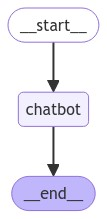

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

### 讓 LangFuse 成為你的 AI 觀察員

接下來，我們使用 [Langfuse callback handler for LangChain](https://langfuse.com/docs/integrations/langchain/tracing) 來追蹤每一個步驟，僅需在程式碼當中添加 `config={"callbacks": [langfuse_handler]}`

In [ ]:
from langfuse.callback import CallbackHandler

# Initialize Langfuse CallbackHandler for Langchain (tracing)
langfuse_handler = CallbackHandler()

for s in graph.stream({"messages": [HumanMessage(content = "What is Langfuse?")]},
                      config={"callbacks": [langfuse_handler]}):
    print(s)

{'chatbot': {'messages': [AIMessage(content='Langfuse is a platform designed to help developers monitor and observe their Large Language Model (LLM) applications. It provides tools for logging, tracing, and visualizing the interactions and performance of LLMs, making it easier to understand how these models are being used and how they are performing in real-world applications.\n\nKey features of Langfuse include:\n\n1. **Logging**: Captures detailed logs of interactions with LLMs, including inputs, outputs, and metadata.\n2. **Tracing**: Allows developers to trace the flow of data through their LLM applications, helping to identify bottlenecks and performance issues.\n3. **Visualization**: Provides visual tools to analyze the performance and usage patterns of LLMs, making it easier to spot trends and anomalies.\n4. **Integration**: Can be integrated with various LLMs and development environments to provide seamless monitoring and observation capabilities.\n\nLangfuse aims to enhance th

通過添加 [Langfuse callback handler for LangChain](https://langfuse.com/docs/integrations/langchain/tracing), 你就像給你的 AI 助手配備了一個智能記錄儀,記錄下每一次對話的細節。

### 在 LangFuse 中查看對話軌跡

這邊直接上圖，可以在專案底下/traces 查看每一個對話紀錄，回顧你的 AI 助手與用戶的每一次互動。


![Trace view of chat app in Langfuse，要補上節圖](https://i.imgur.com/9N5mfpU.png)

## 範例 2:打造多智能體超級團隊

現在,讓我們挑戰更高級的任務 - 創建一個由多個專門 AI 智能體組成的超級團隊。

**在這個例子中,我們將:**:

*   創建兩個執行 Agent:一個負責搜索維基百科的研究員,一個負責報告當前時間的時間管理員
*   設計一個 Agent 主管,負責將用戶問題分配給合適的 Agent
*   使用 LangFuse 追蹤整個團隊的工作流程

In [ ]:
%pip install --quiet langgraph langchain langchain_openai langchain_experimental pandas wikipedia

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 4.1 MB/s eta 0:00:00


### 提供團隊工具使用

在這範例中，你將提供 Agent 工具，一個是 wiki 研究員用，另一個則是可以計算當前時間。

In [ ]:
from typing import Annotated

from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
from datetime import datetime
from langchain.tools import Tool

# Define a tools that searches Wikipedia
wikipedia_tool = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

# Define a new tool that returns the current datetime
datetime_tool = Tool(
    name="Datetime",
    func = lambda x: datetime.now().isoformat(),
    description="Returns the current datetime",
)

### 打造方便小工具

定義工具好方便提供給 Agent

In [ ]:
from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_openai import ChatOpenAI

def create_agent(llm: ChatOpenAI, system_prompt: str, tools: list):
    # Each worker node will be given a name and some tools.
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                system_prompt,
            ),
            MessagesPlaceholder(variable_name="messages"),
            MessagesPlaceholder(variable_name="agent_scratchpad"),
        ]
    )
    agent = create_openai_tools_agent(llm, tools, prompt)
    executor = AgentExecutor(agent=agent, tools=tools)
    return executor

def agent_node(state, agent, name):
    result = agent.invoke(state)
    return {"messages": [HumanMessage(content=result["output"], name=name)]}

### 設計 Agent 主管

主管將會使用 function calling 選擇是將任務派送給下一個隊員或是結束處理


In [ ]:
from langchain_core.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

members = ["Researcher", "CurrentTime"]
system_prompt = (
    "You are a supervisor tasked with managing a conversation between the"
    " following workers:  {members}. Given the following user request,"
    " respond with the worker to act next. Each worker will perform a"
    " task and respond with their results and status. When finished,"
    " respond with FINISH."
)
# Our team supervisor is an LLM node. It just picks the next agent to process and decides when the work is completed
options = ["FINISH"] + members

# Using openai function calling can make output parsing easier for us
function_def = {
    "name": "route",
    "description": "Select the next role.",
    "parameters": {
        "title": "routeSchema",
        "type": "object",
        "properties": {
            "next": {
                "title": "Next",
                "anyOf": [
                    {"enum": options},
                ],
            }
        },
        "required": ["next"],
    },
}

# Create the prompt using ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next?"
            " Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options), members=", ".join(members))

llm = ChatOpenAI(model="gpt-4o")

# Construction of the chain for the supervisor agent
supervisor_chain = (
    prompt
    | llm.bind_functions(functions=[function_def], function_call="route")
    | JsonOutputFunctionsParser()
)

### 建構整張圖

手上道具都齊全了，將剛剛定義好的狀態跟節點函數連接再一起。最後使用 edge 連接確保每個節點都有連接。

In [ ]:
import functools
import operator
from typing import Sequence, TypedDict
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langgraph.graph import END, StateGraph, START

# The agent state is the input to each node in the graph
class AgentState(TypedDict):
    # The annotation tells the graph that new messages will always be added to the current states
    messages: Annotated[Sequence[BaseMessage], operator.add]
    # The 'next' field indicates where to route to next
    next: str

# Add the research agent using the create_agent helper function
research_agent = create_agent(llm, "You are a web researcher.", [wikipedia_tool])
research_node = functools.partial(agent_node, agent=research_agent, name="Researcher")

# Add the time agent using the create_agent helper function
currenttime_agent = create_agent(llm, "You can tell the current time at", [datetime_tool])
currenttime_node = functools.partial(agent_node, agent=currenttime_agent, name = "CurrentTime")

workflow = StateGraph(AgentState)

# Add a "chatbot" node. Nodes represent units of work. They are typically regular python functions.
workflow.add_node("Researcher", research_node)
workflow.add_node("CurrentTime", currenttime_node)
workflow.add_node("supervisor", supervisor_chain)

# We want our workers to ALWAYS "report back" to the supervisor when done
for member in members:
    workflow.add_edge(member, "supervisor")

# Conditional edges usually contain "if" statements to route to different nodes depending on the current graph state.
# These functions receive the current graph state and return a string or list of strings indicating which node(s) to call next.
conditional_map = {k: k for k in members}
conditional_map["FINISH"] = END
workflow.add_conditional_edges("supervisor", lambda x: x["next"], conditional_map)

# Add an entry point. This tells our graph where to start its work each time we run it.
workflow.add_edge(START, "supervisor")

# To be able to run our graph, call "compile()" on the graph builder. This creates a "CompiledGraph" we can use invoke on our state.
graph_2 = workflow.compile()

### 視覺化 Agent 團隊

LangGraph 還提供了一個強大的可視化工具,讓你能夠直觀地看到你的 AI 助手之間的溝通方式


```mermaid
graph TD;
	__start__([__start__]):::first
	Researcher(Researcher)
	CurrentTime(CurrentTime)
	supervisor(supervisor)
	__end__([__end__]):::last
	CurrentTime --> supervisor;
	Researcher --> supervisor;
	__start__ --> supervisor;
	supervisor -.-> Researcher;
	supervisor -.-> CurrentTime;
	supervisor -. &nbspFINISH&nbsp .-> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc
```

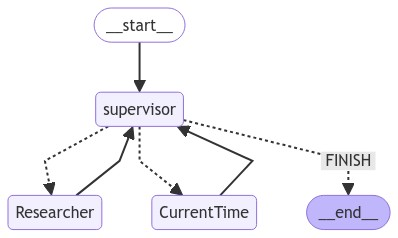

In [ ]:
from IPython.display import Image, display
display(Image(graph_2.get_graph().draw_mermaid_png()))

### 添加 [Langfuse handler](https://langfuse.com/docs/integrations/langchain/tracing) 作為 callback 函數來查看執行結果。

In [ ]:
from langfuse.callback import CallbackHandler

# Initialize Langfuse CallbackHandler for Langchain (tracing)
langfuse_handler = CallbackHandler()

# Add Langfuse handler as callback: config={"callbacks": [langfuse_handler]}
for s in graph_2.stream({"messages": [HumanMessage(content = "How does photosynthesis work?")]},
                      config={"callbacks": [langfuse_handler]}):
    print(s)
    print("----")

{'supervisor': {'next': 'Researcher'}}
----
{'Researcher': {'messages': [HumanMessage(content="Photosynthesis is a biological process used by photosynthetic organisms like plants, algae, and cyanobacteria to convert light energy, typically from sunlight, into chemical energy. Here's a breakdown of how it works:\n\n1. **Light Absorption**: The process begins when light energy is absorbed by reaction centers, which are proteins containing photosynthetic pigments like chlorophyll. In plants, these pigments are located in chloroplasts within leaf cells.\n\n2. **Light-Dependent Reactions**:\n    - **Energy Conversion**: The energy absorbed from light is used to strip electrons from water molecules, resulting in the production of oxygen gas (O₂).\n    - **Formation of NADPH and ATP**: The electrons and hydrogen ions from water are used to form NADPH (reduced nicotinamide adenine dinucleotide phosphate) and ATP (adenosine triphosphate), which are essential molecules for storing and transferri

In [ ]:
# Add Langfuse handler as callback: config={"callbacks": [langfuse_handler]}
for s in graph_2.stream({"messages": [HumanMessage(content = "What time is it?")]},
                      config={"callbacks": [langfuse_handler]}):
    print(s)
    print("----")

{'supervisor': {'next': 'CurrentTime'}}
----
{'CurrentTime': {'messages': [HumanMessage(content='The current time is 07:15 AM on August 14, 2024.', name='CurrentTime')]}}
----
{'supervisor': {'next': 'FINISH'}}
----


### 查看對話軌跡


![Trace view of chat app in Langfuse，要補上節圖](https://i.imgur.com/9N5mfpU.png)

透過這種方式,我們不僅創建了一個功能強大的多 Agent 系統,還為它配備了一個全面的監控和分析工具。這讓我們能夠不斷優化系統性能,提升用戶體驗。

## 為你的 AI 團隊添加評分系統


### 評分系統的多樣性
LangFuse 的評分功能[Scores](https://langfuse.com/docs/scores/overview) 極其靈活,可以應用於:

單獨的觀察結果
整個追蹤過程

您可以通過多種方式創建這些評分:

使用 Langfuse UI 中的標註工作流
運行基於模型的評估
通過 SDK 直接輸入(就像我們在這個例子中所做的)

### 靈活的評分方法
LangFuse 提供了兩種主要的評分方法:

1. `langfuse_context.score_current_observation`: 為當前觀察上下文添加評分
2. `langfuse_context.score_current_trace`: 從嵌套層次結構的任何位置為整個追蹤添加評分

這種靈活性讓您可以根據需求精確地評估 AI 的表現。

### 強大的 `observe()` 裝飾器
為了獲取當前觀察的上下文,我們使用了 `[`observe()` decorator](https://langfuse.com/docs/sdk/python/decorators)` 裝飾器。這個強大的工具自動捕獲了豐富的信息:

- 通過上下文變量實現嵌套
- 時間和持續時間
- 函數名稱
- 輸入參數(args 和 kwargs)
- 返回值

這個裝飾器會自動為頂層函數創建追蹤,並為任何嵌套函數創建跨度。


In [ ]:
from langfuse.decorators import langfuse_context, observe

# Langfuse observe() decorator to automatically create a trace for the top-level function and spans for any nested functions.
@observe()
def research_agent(user_message):
    # Get callback handler scoped to this observed function
    lf_handler = langfuse_context.get_current_langchain_handler()

    # Trace langchain run via the Langfuse CallbackHandler
    response = graph_2.invoke({"messages": [HumanMessage(content=user_message)]},
                        config={"callbacks": [lf_handler]})

    # Score the entire trace e.g. to add user feedback
    langfuse_context.score_current_trace(
        name = "user-explicit-feedback",
        value = 1,
        comment = "The time is correct!"
        )

    return response
research_agent("What time is it?")

{'messages': [HumanMessage(content='What time is it?'),
  HumanMessage(content='The current time is 07:23 AM on August 14, 2024.', name='CurrentTime')],
 'next': 'FINISH'}

## LangFuse 提示管理:你的 LLM 提示語中控台

在 AI 開發的世界裡,提示詞(Prompt)就像是與 AI 溝通的魔法咒語。而 LangFuse 的提示管理功能,則是讓你成為這些咒語的魔法師。讓我們深入探索這個強大的工具:

[Langfuse prompt management](https://langfuse.com/docs/prompts/example-langchain) 本質上是一個專門為 AI 提示詞設計的內容管理系統(CMS)。它讓你能夠:

- 有效管理提示詞
- 版本控制你的 AI 指令
- 在生產環境中輕鬆更新和管理提示詞

### 操作說明
在 LangFuse 中創建提示詞時,需要注意以下幾個關鍵元素:

- `Name`: 在 LangFuse 提示管理中識別提示詞的唯一標識符
- `Prompt`: 包含提示模板和輸入變量的實際內容。注意,LangFuse 使用 `{{input variables}}` 的雙括號語法
- `labels`: 添加標籤如 `production`,可以立即將提示詞設為默認使用

### 實戰示例:創建翻譯助手提示語

讓我們通過一個實際例子來看看如何使用 LangFuse 創建和管理提示詞:


In [ ]:
from langfuse import Langfuse

# 初始化 Langfuse 客戶端(用於提示管理)
langfuse = Langfuse()

langfuse.create_prompt(
    name="translator_system-prompt",
    prompt="你是一位翻譯專家,負責將所有輸入文本翻譯成日語。",
    labels=["production"]
)


![View prompt in Langfuse UI](https://i.imgur.com/EUdrjxD.png)

## LangFuse 與 LangChain 的無縫集成

LangFuse 提供了一個便捷的工具方法 `.get_langchain_prompt()`,可以將 `LangFuse` 格式的提示詞轉換成 `LangChain` 可用的字符串:


In [ ]:
# 獲取當前生產版本的提示詞並轉換為 LangChain 可用的格式
langfuse_system_prompt = langfuse.get_prompt("translator_system-prompt")
langchain_system_prompt = langfuse_system_prompt.get_langchain_prompt()
print(langchain_system_prompt)

你是一位翻譯專家,負責將所有輸入文本翻譯成日語。


> 注意: LangFuse 在提示模板中使用雙括號 `({{input variable}})`,而 LangChain 使用單括號 `({input variable})`。`.get_langchain_prompt()` 方法會自動處理這種差異。

## 將新的系統提示詞應用到你的 AI 助手

有了新的系統提示詞,我們就可以更新我們的 AI 助手了:

In [ ]:
from typing import Annotated
from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model = "gpt-4o", temperature = 0.2)

# 為我們的翻譯助手添加系統提示詞
system_prompt = {
    "role": "system",
    "content": langchain_system_prompt
}

def chatbot(state: State):
    messages_with_system_prompt = [system_prompt] + state["messages"]
    response = llm.invoke(messages_with_system_prompt)
    return {"messages": [response]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()

In [ ]:
from langfuse.callback import CallbackHandler

# Initialize Langfuse CallbackHandler for Langchain (tracing)
langfuse_handler = CallbackHandler()

# Add Langfuse handler as callback: config={"callbacks": [langfuse_handler]}
for s in graph.stream({"messages": [HumanMessage(content = "What is Langfuse?")]},
                      config={"callbacks": [langfuse_handler]}):
    print(s)

{'chatbot': {'messages': [AIMessage(content='Langfuseとは何ですか？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 40, 'total_tokens': 48}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_3aa7262c27', 'finish_reason': 'stop', 'logprobs': None}, id='run-b073661b-b110-4594-98d8-90b3d2dbcbc3-0', usage_metadata={'input_tokens': 40, 'output_tokens': 8, 'total_tokens': 48})]}}


通過這種方式,我們成功地將 LangFuse 管理的提示詞集成到了我們的 AI 系統中。
